In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
df = pd.read_csv('AirPassengers.csv', index_col = 'Month', parse_dates = True)

NOTE: Most of the content is from https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/
<h3>Time Series Decomposition</h3>
<p>Time series decomposition involves thinking of a series as a combination of level, trend, seasonality, and noise components.</p>
<p>Decomposition provides a useful abstract model for thinking about time series generally and for better understanding problems during time series analysis and forecasting.</p>

<h4>Time Series Components</h4>
<p>A useful abstraction for selecting forecasting methods is to break a time series down into systematic and unsystematic components.</p>

<p> <b>Systematic</b>: Components of the time series that have consistency or recurrence and can be described and modeled.</p>
<p> <b>Non-Systematic</b>: Components of the time series that cannot be directly modeled.</p>

<p>A given time series is thought to consist of three systematic components including level, trend, seasonality, and one non-systematic component called noise.</p>

These components are defined as follows:
<ul>
    <li>Level: The average value in the series.</li>
    <li>Trend: The increasing or decreasing value in the series.</li>
    <li>Seasonality: The repeating short-term cycle in the series.</li>
    <li>Noise: The random variation in the series.</li>
</ul>

<h4>Combining Time Series Components</h4>
<p>A series is thought to be an aggregate or combination of these four components.</p>

<p>All series have a level and noise. The trend and seasonality components are optional.</p>

<p>It is helpful to think of the components as combining either additively or multiplicatively.</p>

<h4>Additive Model</h4>
<p>An additive model suggests that the components are added together as follows:</p>
<i>y(t) = Level + Trend + Seasonality + Noise </i>

<p>An additive model is linear where changes over time are consistently made by the same amount.

A linear trend is a straight line.

A linear seasonality has the same frequency (width of cycles) and amplitude (height of cycles).</p>

<h4>Multiplicative Model</h4>
<p>
A multiplicative model suggests that the components are multiplied together as follows:<br />
<i> y(t) = Level * Trend * Seasonality * Noise </i>

A multiplicative model is nonlinear, such as quadratic or exponential. Changes increase or decrease over time.

A nonlinear trend is a curved line.

A non-linear seasonality has an increasing or decreasing frequency and/or amplitude over time.
</p>

<p>
    <h4>Decomposition as a Tool</h4>
This is a useful abstraction.

Decomposition is primarily used for time series analysis, and as an analysis tool it can be used to inform forecasting models on your problem.

It provides a structured way of thinking about a time series forecasting problem, both generally in terms of modeling complexity and specifically in terms of how to best capture each of these components in a given model.

Each of these components are something you may need to think about and address during data preparation, model selection, and model tuning. You may address it explicitly in terms of modeling the trend and subtracting it from your data, or implicitly by providing enough history for an algorithm to model a trend if it may exist.

You may or may not be able to cleanly or perfectly break down your specific time series as an additive or multiplicative model.

Real-world problems are messy and noisy. There may be additive and multiplicative components. There may be an increasing trend followed by a decreasing trend. There may be non-repeating cycles mixed in with the repeating seasonality components.

Nevertheless, these abstract models provide a simple framework that you can use to analyze your data and explore ways to think about and forecast your problem.
</p>

<p>
    <h4>Automatic Time Series Decomposition</h4>
There are methods to automatically decompose a time series.

The statsmodels library provides an implementation of the naive, or classical, decomposition method in a function called seasonal_decompose(). It requires that you specify whether the model is additive or multiplicative.

Both will produce a result and you must be careful to be critical when interpreting the result. A review of a plot of the time series and some summary statistics can often be a good start to get an idea of whether your time series problem looks additive or multiplicative.

The seasonal_decompose() function returns a result object. The result object contains arrays to access four pieces of data from the decomposition.
</p>

In [3]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [20]:
series = np.linspace(-10, 10, 100) + np.random.randn(100) * 2

In [10]:
result = seasonal_decompose(series, model='additive', period=1)

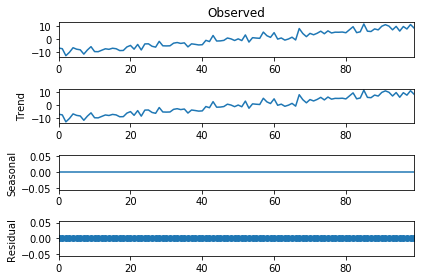

In [11]:
result.plot();

In [12]:
# We can also look at the specific component 
result.trend

array([ -7.02294448,  -7.52908291, -12.90175397, -10.2616542 ,
        -6.77052163,  -7.91131   ,  -8.36079009, -11.68111567,
        -8.47974278,  -5.96056476,  -9.74807126,  -9.82446046,
        -8.69226615,  -7.58898582,  -8.00343195,  -7.16164005,
        -7.55253715,  -8.96703966,  -8.87853542,  -6.16378367,
        -5.00678005,  -7.86186808,  -4.24211868,  -8.49380025,
        -3.83477039,  -3.76915338,  -5.64921121,  -6.30684109,
        -1.8679368 ,  -5.28718352,  -5.38320912,  -5.29787952,
        -3.26881381,  -2.77174119,  -3.45854288,  -3.01008196,
        -6.11698359,  -3.7712844 ,  -4.16399579,  -4.63613912,
        -4.45509418,  -1.0951794 ,  -2.01521491,   2.6583523 ,
        -1.61383218,  -1.51699836,  -1.11691948,   0.70732108,
         0.03902344,  -1.19720715,   0.05278719,  -1.2594727 ,
         3.08647725,  -2.42039466,   0.95617955,   0.67401281,
         0.46337783,   5.25576319,   2.47405165,   1.20236373,
         4.82810663,  -0.14311162,   0.72988906,  -0.91

In [13]:
result.seasonal

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [14]:
# You can plot each series seperately using matplotlib, or you can add these results into dataframe and explore them more!!

<p>
We can see that the entire series was taken as the trend component and that there was no seasonality.
We can also see that the residual plot is close to zero. This is a good example where the naive, or classical, decomposition was not able to separate the noise that we added from the linear trend.

The naive decomposition method is a simple one, and there are more advanced decompositions available, like Seasonal and Trend decomposition using Loess or STL decomposition.
</p>

<h3> Now Multiplicative model example</h3>

<h4>Note: Multiplicative seasonality is not appropriate for zero and negative values</h4>

In [21]:
# using points from 1 to 15, squaring them and adding some gaussian noise
series = np.arange(1, 16)**2 + np.random.randn(15) * 5
result = seasonal_decompose(series, model='multiplicative', period=1)

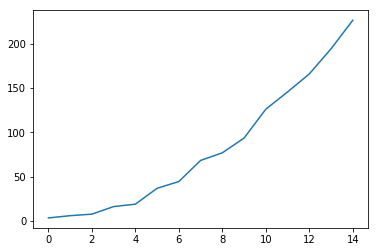

In [22]:
plt.plot(series);

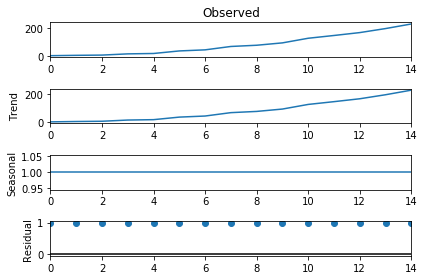

In [23]:
result.plot();

In [34]:
# Now applying this decomposition on Airline passenger dataset
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


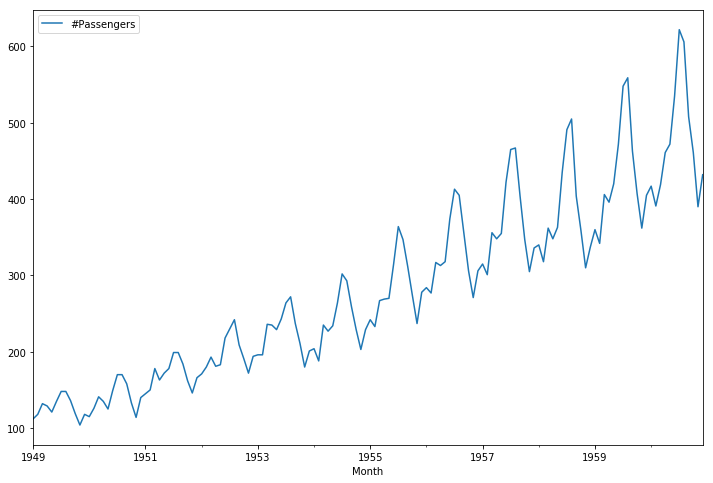

In [35]:
df['#Passengers'].plot(figsize = (12, 8), legend = True);

In [36]:
# We can clearly see there is some trend and seasonality
result = seasonal_decompose(df, model='multiplicative')

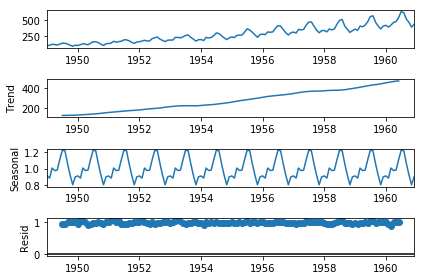

In [37]:
result.plot();

In [38]:
result.seasonal

Month
1949-01-01    0.910230
1949-02-01    0.883625
1949-03-01    1.007366
1949-04-01    0.975906
1949-05-01    0.981378
                ...   
1960-08-01    1.219911
1960-09-01    1.060492
1960-10-01    0.921757
1960-11-01    0.801178
1960-12-01    0.898824
Name: seasonal, Length: 144, dtype: float64

<h4>Note: When applied on the dataframe, each attribute of result (trend, observed, seasonal, residual)
      are pandas series</h4>

In [39]:
# therefore we can do like this,
result.trend.describe()

count    132.000000
mean     278.001263
std      102.591115
min      126.791667
25%      190.729167
50%      259.479167
75%      372.229167
max      475.041667
Name: trend, dtype: float64

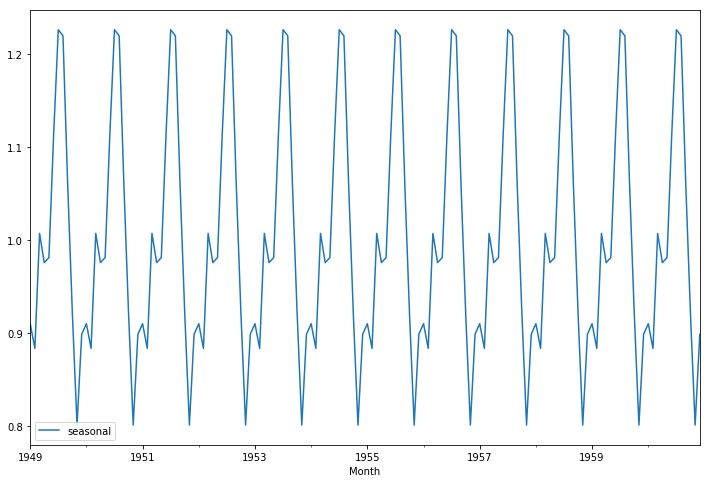

In [40]:
result.seasonal.plot(figsize = (12, 8), legend = True);

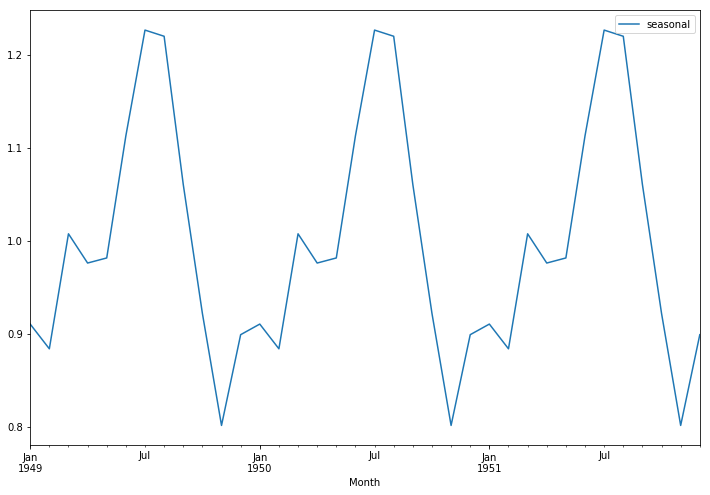

In [41]:
# Also for better understanding of seasonality, we can zoom in data
result.seasonal['1949' : '1951'].plot(figsize = (12, 8), legend = True);

<p> Exponential smoothing is a time series forecasting method for univariate data that can be extended to support data with a systematic trend or seasonal component.
    
 We previously seen how simple moving average (SMA) can be used to capture (or model :) ) general trend, we can expand this 
idea by using exponentially moving weighted average (EMWA). It would be nice if we would weight more the recent data and 
weight less the less recent data
Some issues with SMA is 
    
1) For entire dataset we are constrained to the fixed window size<br />
2) Smaller window size will lead to more noise rather than signal<br />
3) It will never reach to the peak or valley due to the averaging<br />
4) Does not really inform about future behaviour, instead it just describes general trend<br />

EMWA will allow us to overcome the above issues
</p>

<p>
    <h3>What Is Exponential Smoothing?</h3>
Exponential smoothing is a time series forecasting method for univariate data.

Time series methods like the Box-Jenkins ARIMA family of methods develop a model where the prediction is a weighted linear sum of recent past observations or lags.

Exponential smoothing forecasting methods are similar in that a prediction is a weighted sum of past observations, but the model explicitly uses an exponentially decreasing weight for past observations.

Specifically, past observations are weighted with a geometrically decreasing ratio.

<h4>There are three main types of exponential smoothing time series forecasting methods.</h4>

<b>Single Exponential Smoothing</b>, SES for short, also called Simple Exponential Smoothing, is a time series forecasting method for univariate data without a trend or seasonality.

It requires a single parameter, called alpha (a), also called the smoothing factor or smoothing coefficient.

When you look at the parameters, see adjust = True
<img src="simple_EWMA.png" />
<img src="simple_EWMA_1.png" />
<img src="simple_EWMA_2.png" />
This parameter controls the rate at which the influence of the observations at prior time steps decay exponentially (weight for previous time steps) . Alpha is often set to a value between 0 and 1. Large values mean that the model pays attention mainly to the most recent past observations, whereas smaller values mean more of the history is taken into account when making a prediction.

<b>Double Exponential Smoothing</b>
Double Exponential Smoothing is an extension to Exponential Smoothing that explicitly adds support for trends in the univariate time series.

In addition to the alpha parameter for controlling smoothing factor for the level, an additional smoothing factor is added to control the decay of the influence of the change in trend called beta (b).



The method supports trends that change in different ways: an additive and a multiplicative, depending on whether the trend is linear or exponential respectively.

Double Exponential Smoothing with an additive trend is classically referred to as Holt’s linear trend model, named for the developer of the method Charles Holt.

Additive Trend: Double Exponential Smoothing with a linear trend.
Multiplicative Trend: Double Exponential Smoothing with an exponential trend.

For longer range (multi-step) forecasts, the trend may continue on unrealistically. As such, it can be useful to dampen the trend over time.
Dampening means reducing the size of the trend over future time steps down to a straight line (no trend).

Hyperparameters:

Alpha: Smoothing factor for the level.
Beta: Smoothing factor for the trend.
Trend Type: Additive or multiplicative.
Dampen Type: Additive or multiplicative.
Phi: Damping coefficient

<b>Triple Exponential Smoothing</b>
Triple Exponential Smoothing is an extension of Exponential Smoothing that explicitly adds support for seasonality to the univariate time series.

This method is sometimes called Holt-Winters Exponential Smoothing, named for two contributors to the method: Charles Holt and Peter Winters.

In addition to the alpha and beta smoothing factors, a new parameter is added called gamma (g) that controls the influence on the seasonal component.

As with the trend, the seasonality may be modeled as either an additive or multiplicative process for a linear or exponential change in the seasonality.

Additive Seasonality: Triple Exponential Smoothing with a linear seasonality.
Multiplicative Seasonality: Triple Exponential Smoothing with an exponential seasonality.

Triple exponential smoothing is the most advanced variation of exponential smoothing and through configuration, it can also develop double and single exponential smoothing models.

Additionally, to ensure that the seasonality is modeled correctly, the number of time steps in a seasonal period (Period) must be specified. For example, if the series was monthly data and the seasonal period repeated each year, then the Period=12.

Hyperparameters:

Alpha: Smoothing factor for the level.
Beta: Smoothing factor for the trend.
Gamma: Smoothing factor for the seasonality.
Trend Type: Additive or multiplicative.
Dampen Type: Additive or multiplicative.
Phi: Damping coefficient.
Seasonality Type: Additive or multiplicative.
Period: Time steps in seasonal period.

</p>

In [ ]:
# Let's look at some example
# SMA: Simple Moving Average
# We are using 6 month as we have monthly data
df['6-Month-SMA'] = df['#Passengers'].rolling(window = 6).mean()
df['12-Month-SMA'] = df['#Passengers'].rolling(window = 12).mean()


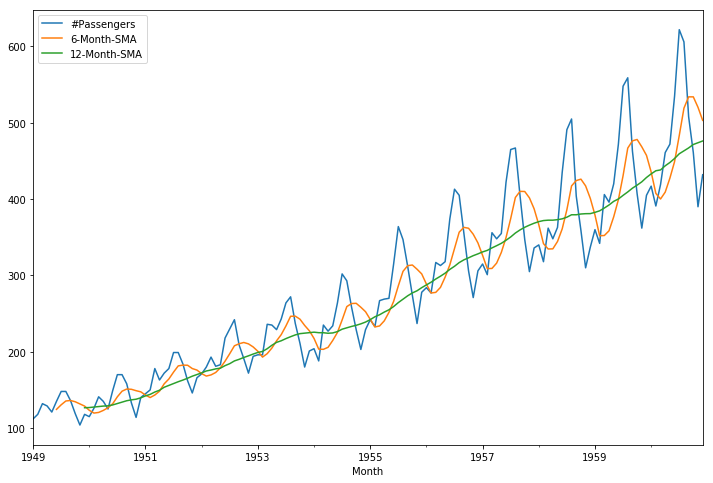

In [43]:
df.plot(figsize = (12, 8), legend = True);

In [45]:
# The important parameters for this are, adjust, span, alpha

df['EWMA 12-Month'] = df['#Passengers'].ewm(span = 12, ).mean()